# Spectrogram Classifier

## Imports

In [1]:
import tensorflow.python.keras
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras.models import Sequential
import h5py
import data_parser
import sys
import os
from pathlib import Path
import subprocess
import queue
import threading
import time
import _thread
import librosa.core
import matplotlib
import matplotlib.pyplot as plt
import itertools
import imageio
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from IPython.display import Image, display
from tensorflow.keras.callbacks import EarlyStopping

## Constants and Utilities

In [2]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

IMAGE_HIGHT = data_parser.IMAGE_HIGHT
IMAGE_WIDTH = data_parser.IMAGE_WIDTH
IMAGE_CHANNELS = data_parser.IMAGE_CHANNELS
IMAGE_SLICES = data_parser.IMAGE_SLICES

def nowStr(): return time.strftime("%Y-%m-%d_%H-%M-%S")

In [34]:
def plot_loss_curve(history, title_prefix=''):
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['Training loss', 'Validation Loss'])
    plt.xlabel('Epochs ')
    plt.ylabel('Loss')
    plt.title(title_prefix+'Loss Curves')
    plt.show()

def plot_acc_curve(history, title_prefix=''):
    plt.figure()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(['Training Accuracy', 'Validation Accuracy'])
    plt.xlabel('Epochs ')
    plt.ylabel('Accuracy')
    plt.title(title_prefix+'Accuracy Curves')
    plt.show()

## Collect the Data

blues


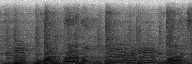

blues


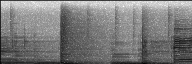

classical


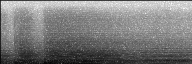

classical


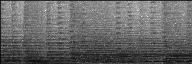

country


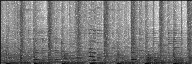

country


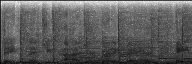

disco


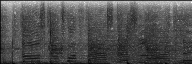

hiphop


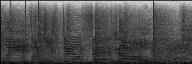

hiphop


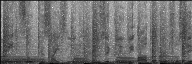

jazz


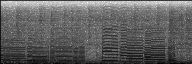

jazz


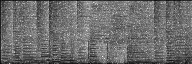

metal


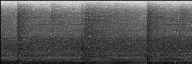

pop


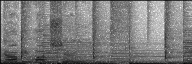

pop


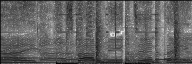

reggae


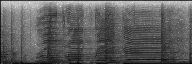

reggae


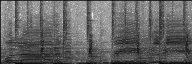

rock


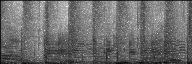

In [4]:
(training_data, training_labels),(val_data, val_labels)=data_parser.load_png_training_data(validation_split=0.15)
training_labels_onehot = to_categorical(training_labels)
val_labels_onehot = to_categorical(val_labels)

for i in range(0,training_data.shape[0],450):
    print(genres[training_labels[i,0]])
    display(array_to_img(training_data[i]))

## Binary Model per Genre

### Build Model

In [22]:
genre_models = []
for genre in genres:
    model = Sequential()
    model.add(Conv2D(filters=32,
                     kernel_size=(8,6),
                     strides=(4,2),
                     input_shape=(IMAGE_HIGHT,
                                  IMAGE_WIDTH,
                                  IMAGE_CHANNELS),
                     data_format="channels_last"))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(32,(1,2),(1,1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(1,2)))

    model.add(Conv2D(64,(2,2),(1,1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128,(2,2),(1,1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    #TODO: Change `loss='binary_crossentropy'` to something better for 10 class problems.
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    genre_models.append(model)

In [95]:
merge_model = tensorflow.keras.models.Sequential()
merge_model.add(Dense(10, input_dim=10, activation='relu'))
merge_model.add(Dense(10, activation='softmax'))
merge_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

### Train Model

Training blues model.
Train on 7600 samples, validate on 1400 samples
Epoch 1/10
7600/7600 [==============================] - 29s 4ms/step - loss: 1.6037 - acc: 0.6309 - val_loss: 0.7498 - val_acc: 0.1007
Epoch 2/10
7600/7600 [==============================] - 27s 4ms/step - loss: 0.7077 - acc: 0.6297 - val_loss: 0.7116 - val_acc: 0.1336
Epoch 3/10
7600/7600 [==============================] - 27s 4ms/step - loss: 0.6791 - acc: 0.5942 - val_loss: 0.6822 - val_acc: 0.5479
Epoch 4/10
7600/7600 [==============================] - 27s 4ms/step - loss: 0.6061 - acc: 0.6029 - val_loss: 0.4204 - val_acc: 0.6207
Epoch 5/10
7600/7600 [==============================] - 28s 4ms/step - loss: 0.6040 - acc: 0.5901 - val_loss: 0.4949 - val_acc: 0.5693
Epoch 6/10
7600/7600 [==============================] - 28s 4ms/step - loss: 0.5475 - acc: 0.6378 - val_loss: 0.4529 - val_acc: 0.5521


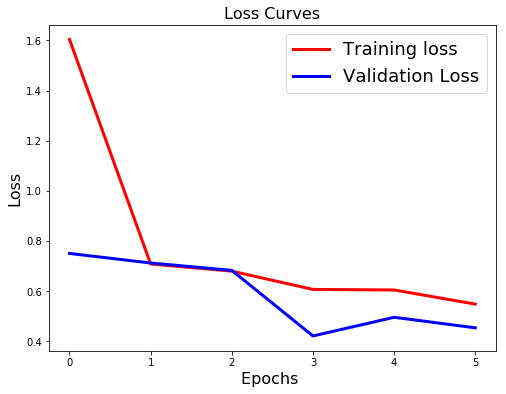

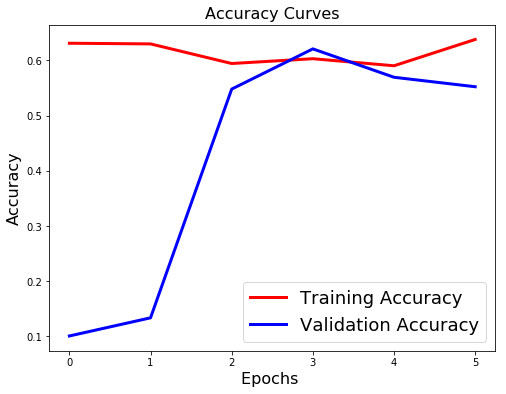

7600/7600 [==============================] - 14s 2ms/step
[0.42048679759750435, 0.5852631578947368]
Training classical model.
Train on 7600 samples, validate on 1400 samples
Epoch 1/10
7600/7600 [==============================] - 29s 4ms/step - loss: 1.1459 - acc: 0.4909 - val_loss: 0.7130 - val_acc: 0.1000
Epoch 2/10
7600/7600 [==============================] - 28s 4ms/step - loss: 0.7005 - acc: 0.5663 - val_loss: 0.6873 - val_acc: 0.9000
Epoch 3/10
7600/7600 [==============================] - 28s 4ms/step - loss: 0.7345 - acc: 0.6661 - val_loss: 0.6688 - val_acc: 0.9000
Epoch 4/10
7600/7600 [==============================] - 27s 4ms/step - loss: 0.7190 - acc: 0.7495 - val_loss: 0.5086 - val_acc: 0.9000
Epoch 5/10
7600/7600 [==============================] - 29s 4ms/step - loss: 0.6746 - acc: 0.6258 - val_loss: 0.7795 - val_acc: 0.1000
Epoch 6/10
7600/7600 [==============================] - 27s 4ms/step - loss: 0.6581 - acc: 0.5161 - val_loss: 0.2837 - val_acc: 0.8664
Epoch 7/10
7600/

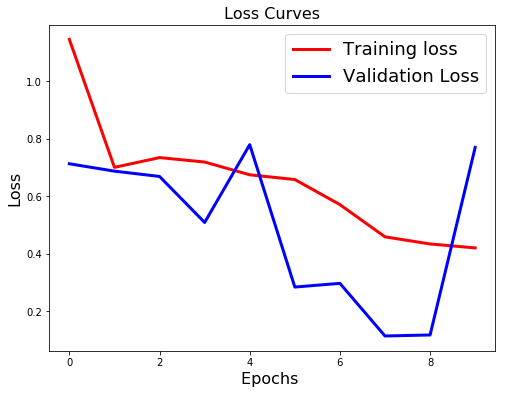

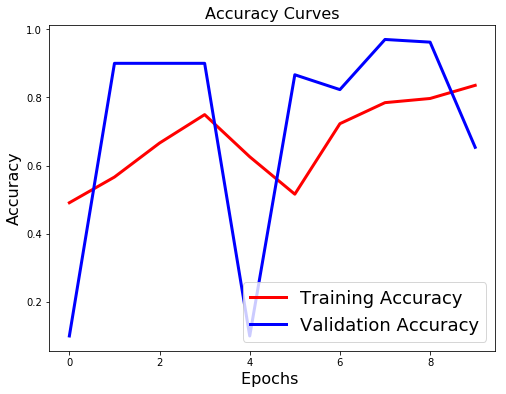

7600/7600 [==============================] - 15s 2ms/step
[0.8852160636849576, 0.6355263157894737]
Training country model.
Train on 7600 samples, validate on 1400 samples
Epoch 1/10
7600/7600 [==============================] - 29s 4ms/step - loss: 2.9186 - acc: 0.6089 - val_loss: 0.8135 - val_acc: 0.1021
Epoch 2/10
7600/7600 [==============================] - 27s 4ms/step - loss: 0.7151 - acc: 0.5493 - val_loss: 0.7219 - val_acc: 0.1007
Epoch 3/10
7600/7600 [==============================] - 27s 4ms/step - loss: 0.7049 - acc: 0.5296 - val_loss: 0.7182 - val_acc: 0.2150
Epoch 4/10
7600/7600 [==============================] - 27s 4ms/step - loss: 0.7143 - acc: 0.4838 - val_loss: 0.6418 - val_acc: 0.5229
Epoch 5/10
7600/7600 [==============================] - 28s 4ms/step - loss: 0.6789 - acc: 0.5082 - val_loss: 0.4791 - val_acc: 0.7600
Epoch 6/10
7600/7600 [==============================] - 28s 4ms/step - loss: 0.6775 - acc: 0.5645 - val_loss: 0.9200 - val_acc: 0.2471
Epoch 7/10
7600/760

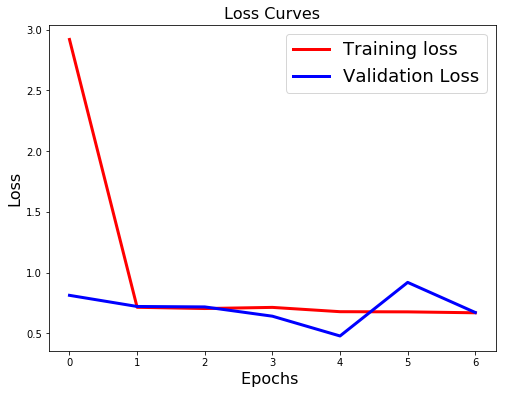

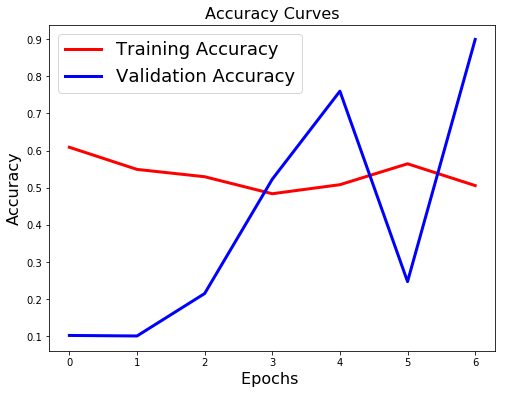

7600/7600 [==============================] - 14s 2ms/step
[0.6708211281425075, 0.8981578947368422]
Training disco model.
Train on 7600 samples, validate on 1400 samples
Epoch 1/10
7600/7600 [==============================] - 29s 4ms/step - loss: 1.4174 - acc: 0.5099 - val_loss: 0.7277 - val_acc: 0.1000
Epoch 2/10
7600/7600 [==============================] - 29s 4ms/step - loss: 0.7056 - acc: 0.5012 - val_loss: 0.6439 - val_acc: 0.9000
Epoch 3/10
7600/7600 [==============================] - 27s 4ms/step - loss: 0.7113 - acc: 0.3029 - val_loss: 0.6971 - val_acc: 0.1000
Epoch 4/10
7600/7600 [==============================] - 28s 4ms/step - loss: 0.6932 - acc: 0.1000 - val_loss: 0.6937 - val_acc: 0.1000


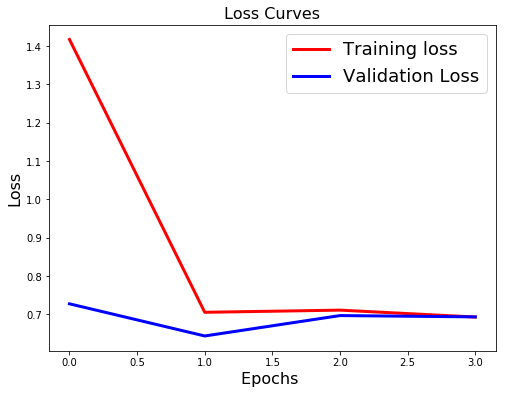

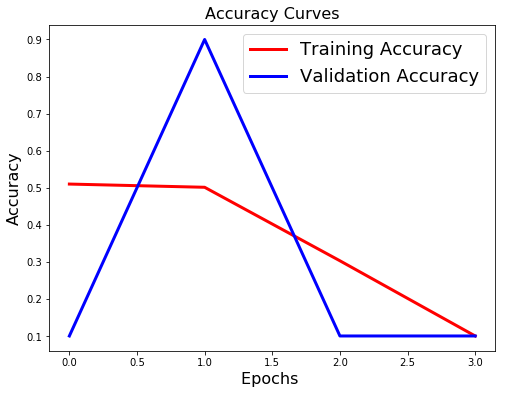

7600/7600 [==============================] - 14s 2ms/step
[0.6936671785304421, 0.1]
Training hiphop model.
Train on 7600 samples, validate on 1400 samples
Epoch 1/10
7600/7600 [==============================] - 29s 4ms/step - loss: 7.8893 - acc: 0.8914 - val_loss: 1.6118 - val_acc: 0.9000
Epoch 2/10
7600/7600 [==============================] - 27s 4ms/step - loss: 7.9059 - acc: 0.9000 - val_loss: 1.6118 - val_acc: 0.9000
Epoch 3/10
7600/7600 [==============================] - 28s 4ms/step - loss: 7.8546 - acc: 0.9000 - val_loss: 1.6118 - val_acc: 0.9000


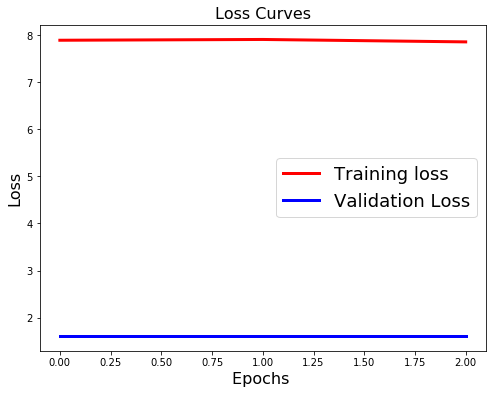

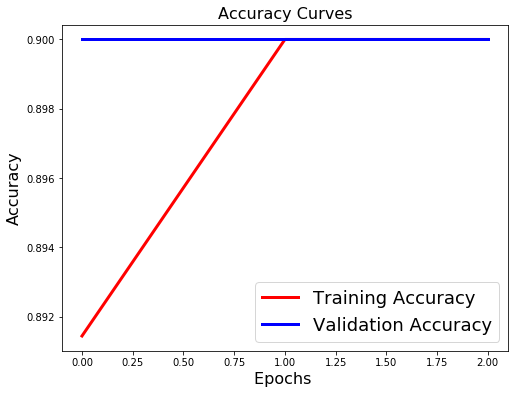

7600/7600 [==============================] - 14s 2ms/step
[1.611809629689676, 0.9]
Training jazz model.
Train on 7600 samples, validate on 1400 samples
Epoch 1/10
7600/7600 [==============================] - 29s 4ms/step - loss: 1.3075 - acc: 0.6083 - val_loss: 0.7020 - val_acc: 0.3364
Epoch 2/10
7600/7600 [==============================] - 29s 4ms/step - loss: 0.7133 - acc: 0.5067 - val_loss: 0.5956 - val_acc: 0.7000
Epoch 3/10
7600/7600 [==============================] - 28s 4ms/step - loss: 0.7007 - acc: 0.5978 - val_loss: 0.6256 - val_acc: 0.8393
Epoch 4/10
7600/7600 [==============================] - 29s 4ms/step - loss: 0.7273 - acc: 0.6845 - val_loss: 0.5441 - val_acc: 0.8050
Epoch 5/10
7600/7600 [==============================] - 29s 4ms/step - loss: 0.7179 - acc: 0.5762 - val_loss: 0.5135 - val_acc: 0.7421
Epoch 6/10
7600/7600 [==============================] - 28s 4ms/step - loss: 0.6375 - acc: 0.6418 - val_loss: 0.4410 - val_acc: 0.8236
Epoch 7/10
7600/7600 [================

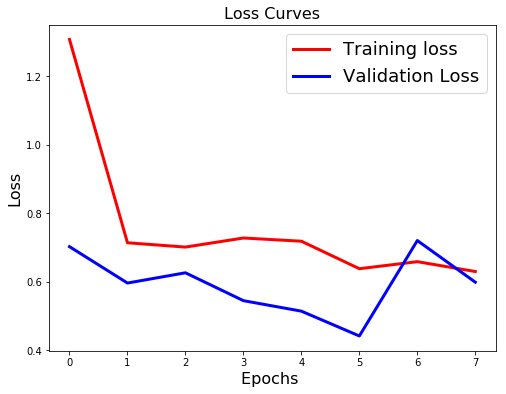

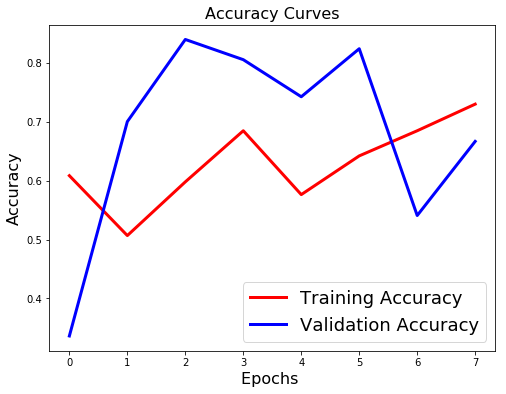

7600/7600 [==============================] - 14s 2ms/step
[0.5509200746252348, 0.7]
Training metal model.
Train on 7600 samples, validate on 1400 samples
Epoch 1/10
7600/7600 [==============================] - 28s 4ms/step - loss: 1.0200 - acc: 0.6626 - val_loss: 0.3810 - val_acc: 0.8136
Epoch 2/10
7600/7600 [==============================] - 30s 4ms/step - loss: 0.5038 - acc: 0.7701 - val_loss: 0.6698 - val_acc: 0.5571
Epoch 3/10
7600/7600 [==============================] - 27s 4ms/step - loss: 0.4726 - acc: 0.7721 - val_loss: 0.2215 - val_acc: 0.8829
Epoch 4/10
7600/7600 [==============================] - 27s 4ms/step - loss: 0.4160 - acc: 0.7734 - val_loss: 0.4207 - val_acc: 0.7279
Epoch 5/10
7600/7600 [==============================] - 28s 4ms/step - loss: 0.3843 - acc: 0.8032 - val_loss: 0.3546 - val_acc: 0.9000


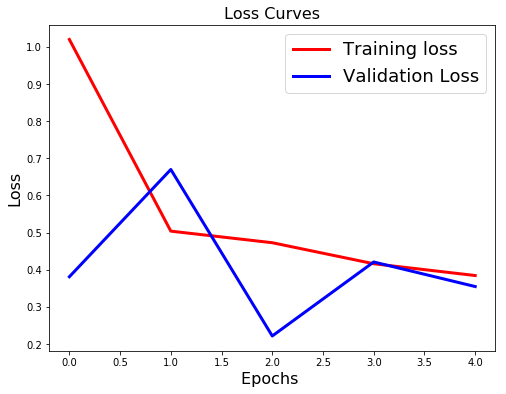

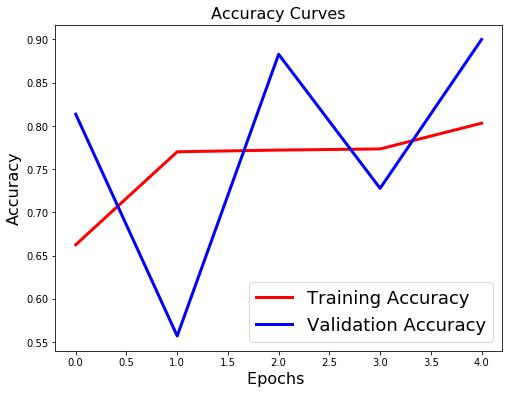

7600/7600 [==============================] - 14s 2ms/step
[0.3713771744466019, 0.9001315789473684]
Training pop model.
Train on 7600 samples, validate on 1400 samples
Epoch 1/10
7600/7600 [==============================] - 29s 4ms/step - loss: 1.1820 - acc: 0.6179 - val_loss: 0.2157 - val_acc: 0.9000
Epoch 2/10
7600/7600 [==============================] - 27s 4ms/step - loss: 0.5137 - acc: 0.7125 - val_loss: 0.4595 - val_acc: 0.6514
Epoch 3/10
7600/7600 [==============================] - 27s 4ms/step - loss: 0.5242 - acc: 0.7141 - val_loss: 0.5222 - val_acc: 0.6800


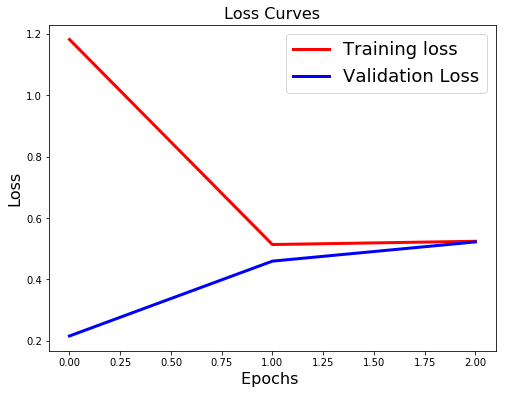

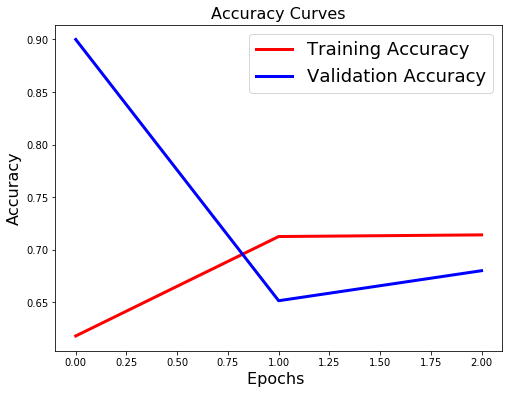

7600/7600 [==============================] - 14s 2ms/step
[0.5732604525845397, 0.6339473684210526]
Training reggae model.
Train on 7600 samples, validate on 1400 samples
Epoch 1/10
7600/7600 [==============================] - 28s 4ms/step - loss: 1.8478 - acc: 0.5039 - val_loss: 0.7143 - val_acc: 0.2500
Epoch 2/10
7600/7600 [==============================] - 28s 4ms/step - loss: 0.7017 - acc: 0.5783 - val_loss: 0.9540 - val_acc: 0.1000
Epoch 3/10
7600/7600 [==============================] - 28s 4ms/step - loss: 0.7545 - acc: 0.4641 - val_loss: 0.7302 - val_acc: 0.1064


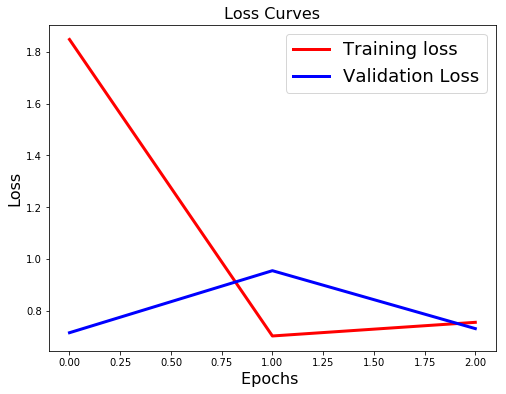

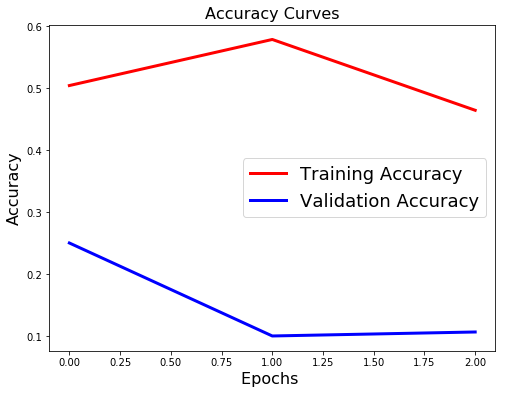

7600/7600 [==============================] - 14s 2ms/step
[0.7291824049698679, 0.10434210526315789]
Training rock model.
Train on 7600 samples, validate on 1400 samples
Epoch 1/10
7600/7600 [==============================] - 29s 4ms/step - loss: 1.1950 - acc: 0.6283 - val_loss: 0.5350 - val_acc: 0.9000
Epoch 2/10
7600/7600 [==============================] - 28s 4ms/step - loss: 0.7713 - acc: 0.6582 - val_loss: 0.6933 - val_acc: 0.4957
Epoch 3/10
7600/7600 [==============================] - 28s 4ms/step - loss: 0.7251 - acc: 0.5761 - val_loss: 0.6908 - val_acc: 0.6271


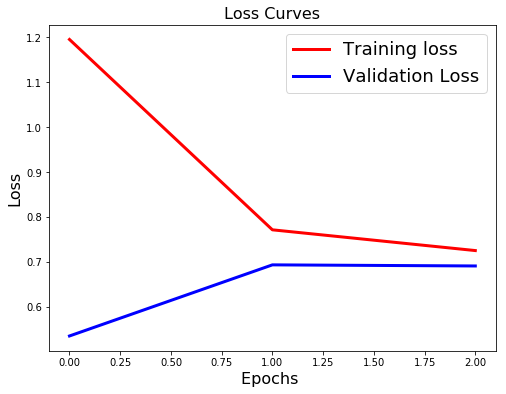

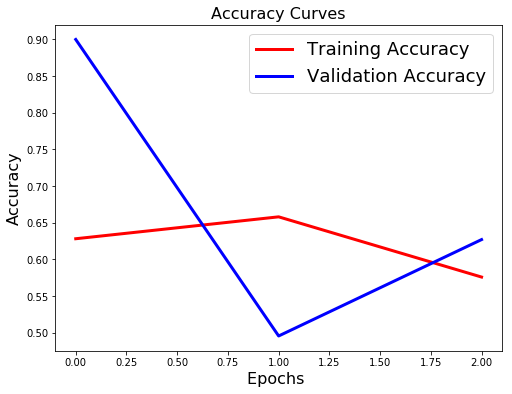

7600/7600 [==============================] - 14s 2ms/step
[0.6905564380946912, 0.6638157894736842]


In [23]:
# new
genre_histories = []
for i, model in enumerate(genre_models):
    print("Training "+genres[i]+" model.")
    history = model.fit(x=training_data,
                        y=training_labels_onehot[:,i],
                        epochs=10,
                        batch_size=100,
                        verbose=1,
                        validation_data=(val_data, val_labels_onehot[:,i]),
                        shuffle=True,
                        class_weight = {0: 1., 1: 9.},
                        callbacks=[EarlyStopping(monitor='val_loss',
                                   min_delta=0,
                                   patience=2,
                                   verbose=1, mode='auto')])
    genre_histories.append(history)
    plot_loss_curve(history)
    plot_acc_curve(history)
    print(model.evaluate(training_data, training_labels_onehot[:,i]))

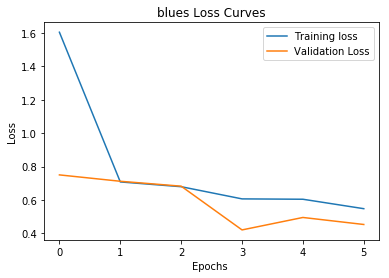

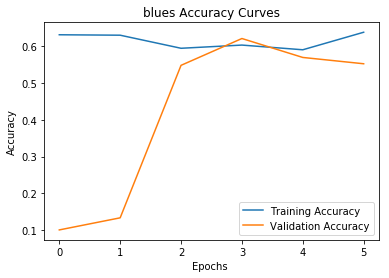

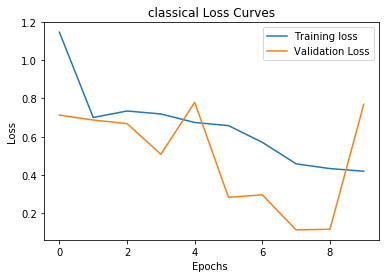

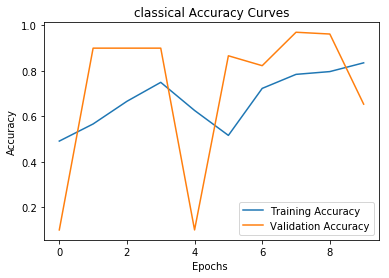

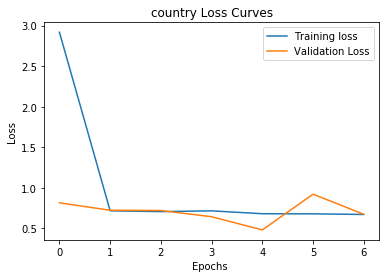

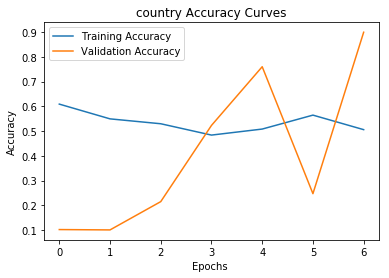

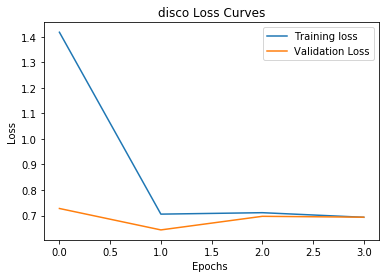

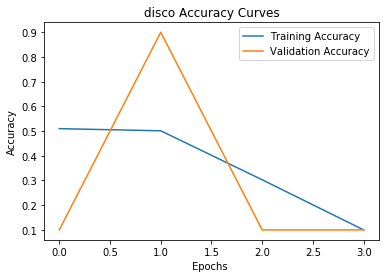

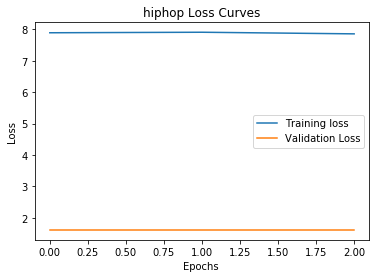

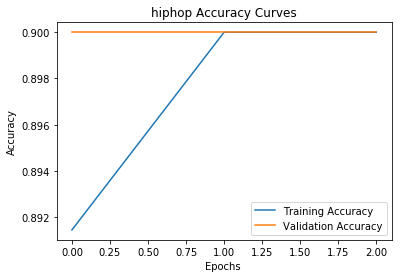

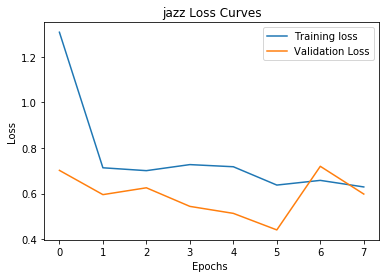

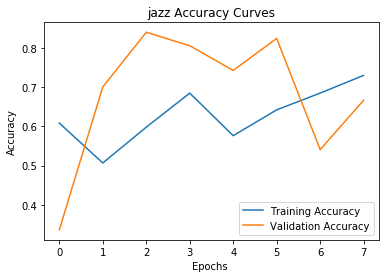

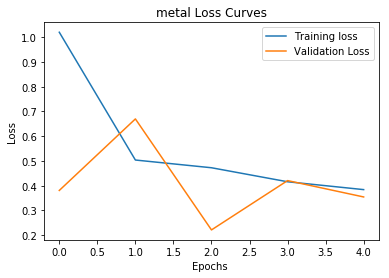

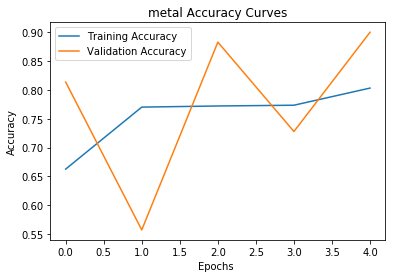

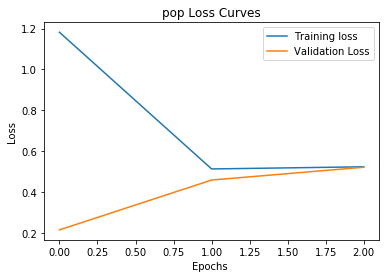

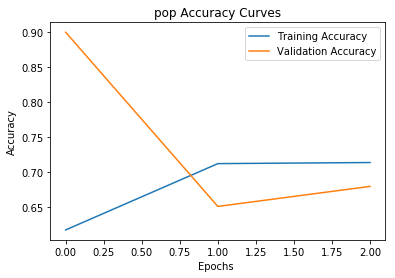

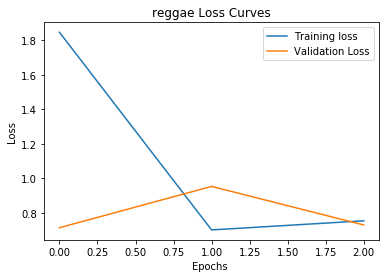

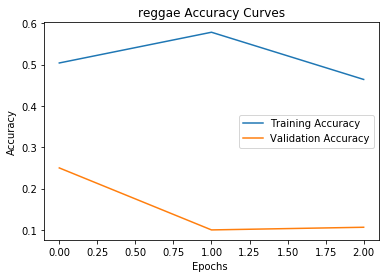

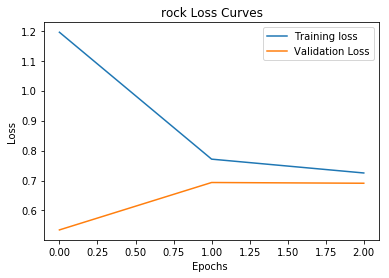

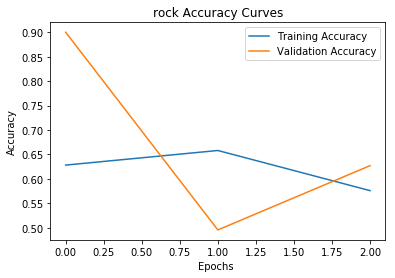

In [35]:
for i, history in enumerate(genre_histories):
    plot_loss_curve(history, title_prefix=genres[i]+' ')
    plot_acc_curve(history, title_prefix=genres[i]+' ')

In [24]:
for i, model in enumerate(genre_models):
    model.save_weights(nowStr() + '_Spectrogram_Classifier_Weights_genre{}.h5'.format(i))

In [49]:
def evaluate_confidences(x):
    y = np.zeros((x.shape[0], 10))
    for i in range(x.shape[0]):
        for genre in range(10):
            y[i, genre] = genre_models[genre].predict(x[i:i+1])[0,0]
    return y

In [50]:
training_confidences = evaluate_confidences(training_data)
val_confidences = evaluate_confidences(val_data)

Train on 7600 samples, validate on 1400 samples
Epoch 1/10
7600/7600 [==============================] - 2s 325us/step - loss: 2.1697 - acc: 0.1842 - val_loss: 2.0081 - val_acc: 0.2600
Epoch 2/10
7600/7600 [==============================] - 1s 147us/step - loss: 1.8857 - acc: 0.3017 - val_loss: 1.8169 - val_acc: 0.3157
Epoch 3/10
7600/7600 [==============================] - 1s 146us/step - loss: 1.7830 - acc: 0.3175 - val_loss: 1.7663 - val_acc: 0.3214
Epoch 4/10
7600/7600 [==============================] - 1s 152us/step - loss: 1.7434 - acc: 0.3305 - val_loss: 1.7399 - val_acc: 0.3286
Epoch 5/10
7600/7600 [==============================] - 1s 154us/step - loss: 1.7195 - acc: 0.3339 - val_loss: 1.7184 - val_acc: 0.3586
Epoch 6/10
7600/7600 [==============================] - 1s 151us/step - loss: 1.6993 - acc: 0.3507 - val_loss: 1.6939 - val_acc: 0.3650
Epoch 7/10
7600/7600 [==============================] - 1s 164us/step - loss: 1.6818 - acc: 0.3667 - val_loss: 1.6840 - val_acc: 0.3764


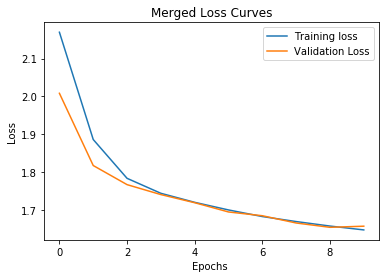

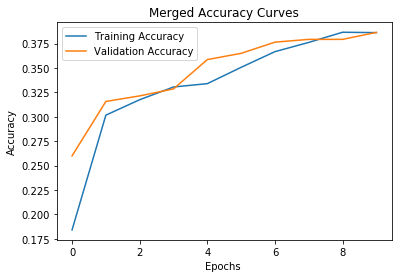

In [96]:
merge_history = merge_model.fit(training_confidences,
                                training_labels_onehot,
                                batch_size=10,
                                epochs=10,
                                verbose=1,
                                validation_data=(val_confidences,
                                                 val_labels_onehot),
                               callbacks=[EarlyStopping(monitor='val_loss',
                                   min_delta=0,
                                   patience=2,
                                   verbose=1, mode='auto')])
plot_loss_curve(merge_history, title_prefix='Merged ')
plot_acc_curve(merge_history, title_prefix='Merged ')

### Test Model

In [36]:
def classify(instance, by_ordering=False):
    best = (0, 0)
    if by_ordering:
        temp = [(i, model.predict(instance)[0,0]) for i, model in enumerate(genre_models)]
        list.sort(temp, key=lambda x: x[1], reverse=True)
        return temp
    for i, model in enumerate(genre_models):
        temp = model.predict(instance)[0,0]
        if best[1] < temp:
            best = (i, temp)
    return best[0]

def sum_confidence_voting(instances):
    ballots = [classify(instances[i:i+1], by_ordering=True) for i in range(10)]
    totals = {genre: 0 for genre in range(10)}
    for ballot in ballots:
        for genre, conf in ballot:
            totals[genre] += conf
    return max(totals.items(), key=lambda x: x[1])

def ranked_choice_election(instances):
    ballots = [classify(instances[i:i+1], by_ordering=True) for i in range(10)]
    winner = None
    counts = {genre: 0 for genre in range(10)}
    numCounting = 2
    while winner is None:
        counts = {k: 0 for k in counts.keys()}
        for ballot in ballots:
#             print('ballot')
            numCounted = 0
            for genre, conf in ballot:
#                 print("{} with {}".format(genre, conf))
                if genre in counts.keys():
                    numCounted += 1
                    counts[genre] += 1/numCounted
                    if numCounted >= numCounting:
                        break
        if max(counts.values()) >= 8:
            winner = max(counts.items(), key=lambda x: x[1])
        else:
            for k, v in list(counts.items()):
                if v == 0:
                    del counts[k]
            loser = min(counts.items(), key=lambda x: x[1])
#             print("Dropping {}".format(loser))
            del counts[loser[0]]
    return winner
            
        

In [38]:
correct = 0
incorrect = 0

for i in range(0,training_data.shape[0],IMAGE_SLICES):
    winner = sum_confidence_voting(training_data[i:i+IMAGE_SLICES])
    if i %(9*IMAGE_SLICES) == 0 and i > 0:
        print("{} -> {} with {} votes".format(training_labels[i,0], winner[0], winner[1]))
        print("Accuracy: {}".format(correct/(correct+incorrect)))
    if winner[0] == training_labels[i,0]:
        correct += 1
    else:
        incorrect += 1
print("Accuracy: {}".format(correct/(correct+incorrect)))

0 -> 5 with 7.621024191379547 votes
Accuracy: 0.3333333333333333
0 -> 5 with 8.273094534873962 votes
Accuracy: 0.16666666666666666
0 -> 0 with 5.931816041469574 votes
Accuracy: 0.18518518518518517
0 -> 1 with 8.483914494514465 votes
Accuracy: 0.3055555555555556
0 -> 0 with 5.583749949932098 votes
Accuracy: 0.3111111111111111
0 -> 5 with 6.025472193956375 votes
Accuracy: 0.3333333333333333
0 -> 0 with 5.8286309242248535 votes
Accuracy: 0.3492063492063492
0 -> 0 with 5.801856696605682 votes
Accuracy: 0.4027777777777778
1 -> 1 with 9.745712041854858 votes
Accuracy: 0.4444444444444444
1 -> 1 with 9.753154516220093 votes
Accuracy: 0.5
1 -> 1 with 9.68814992904663 votes
Accuracy: 0.5454545454545454
1 -> 1 with 9.780299365520477 votes
Accuracy: 0.5833333333333334
1 -> 1 with 9.803663074970245 votes
Accuracy: 0.6153846153846154
1 -> 1 with 9.507129490375519 votes
Accuracy: 0.6349206349206349
1 -> 1 with 9.813440799713135 votes
Accuracy: 0.6518518518518519
1 -> 1 with 9.890685498714447 votes
Ac

In [110]:
correct = 0
incorrect = 0

for i in range(training_confidences.shape[0]):
    winner = merge_model.predict_classes(training_confidences[i:i+1])[0]
    if i %9 == 0 and i > 0:
        print("{} -> {}".format(training_labels[i,0], winner))
        print("Accuracy: {}".format(correct/(correct+incorrect)))
    if winner == training_labels[i,0]:
        correct += 1
    else:
        incorrect += 1
print("Accuracy: {}".format(correct/(correct+incorrect)))

0 -> 5
Accuracy: 0.8888888888888888
0 -> 0
Accuracy: 0.5
0 -> 2
Accuracy: 0.37037037037037035
0 -> 0
Accuracy: 0.4444444444444444
0 -> 0
Accuracy: 0.5555555555555556
0 -> 0
Accuracy: 0.5555555555555556
0 -> 3
Accuracy: 0.6031746031746031
0 -> 6
Accuracy: 0.625
0 -> 0
Accuracy: 0.6172839506172839
0 -> 0
Accuracy: 0.6555555555555556
0 -> 0
Accuracy: 0.6767676767676768
0 -> 0
Accuracy: 0.7037037037037037
0 -> 5
Accuracy: 0.7008547008547008
0 -> 0
Accuracy: 0.6746031746031746
0 -> 5
Accuracy: 0.6666666666666666
0 -> 0
Accuracy: 0.6666666666666666
0 -> 5
Accuracy: 0.6666666666666666
0 -> 5
Accuracy: 0.6604938271604939
0 -> 0
Accuracy: 0.6432748538011696
0 -> 0
Accuracy: 0.6333333333333333
0 -> 0
Accuracy: 0.6296296296296297
0 -> 5
Accuracy: 0.6363636363636364
0 -> 5
Accuracy: 0.6376811594202898
0 -> 0
Accuracy: 0.6435185185185185
0 -> 5
Accuracy: 0.64
0 -> 0
Accuracy: 0.6367521367521367
0 -> 3
Accuracy: 0.6378600823045267
0 -> 6
Accuracy: 0.623015873015873
0 -> 6
Accuracy: 0.609195402298850

2 -> 0
Accuracy: 0.48686030428769017
2 -> 0
Accuracy: 0.48484848484848486
2 -> 8
Accuracy: 0.4828532235939643
2 -> 1
Accuracy: 0.4813296903460838
2 -> 9
Accuracy: 0.4798185941043084
2 -> 6
Accuracy: 0.4778681120144535
2 -> 0
Accuracy: 0.47593342330184435
2 -> 0
Accuracy: 0.47401433691756273
2 -> 6
Accuracy: 0.47211066488174924
2 -> 6
Accuracy: 0.4702222222222222
2 -> 6
Accuracy: 0.468348826914564
2 -> 0
Accuracy: 0.46649029982363316
2 -> 5
Accuracy: 0.46464646464646464
3 -> 7
Accuracy: 0.46281714785651795
3 -> 4
Accuracy: 0.4610021786492375
3 -> 8
Accuracy: 0.4596354166666667
3 -> 2
Accuracy: 0.4578469520103761
3 -> 7
Accuracy: 0.4560723514211886
3 -> 5
Accuracy: 0.4543114543114543
3 -> 8
Accuracy: 0.45256410256410257
3 -> 8
Accuracy: 0.4508301404853129
3 -> 2
Accuracy: 0.4491094147582697
3 -> 1
Accuracy: 0.44740177439797213
3 -> 4
Accuracy: 0.4457070707070707
3 -> 7
Accuracy: 0.4440251572327044
3 -> 5
Accuracy: 0.4423558897243108
3 -> 8
Accuracy: 0.44069912609238454
3 -> 7
Accuracy: 0

5 -> 1
Accuracy: 0.36693548387096775
5 -> 4
Accuracy: 0.36642074670243685
5 -> 1
Accuracy: 0.3656849620705042
5 -> 2
Accuracy: 0.36495212647517256
5 -> 8
Accuracy: 0.36466666666666664
5 -> 7
Accuracy: 0.3641605677533821
5 -> 1
Accuracy: 0.36365648517042937
5 -> 1
Accuracy: 0.3631544068919814
5 -> 7
Accuracy: 0.36243386243386244
5 -> 1
Accuracy: 0.3619361936193619
5 -> 2
Accuracy: 0.36122090469916557
6 -> 6
Accuracy: 0.3611658996274381
6 -> 6
Accuracy: 0.36242344706911633
6 -> 6
Accuracy: 0.36367605326347957
6 -> 6
Accuracy: 0.36427015250544664
6 -> 6
Accuracy: 0.365514242226571
6 -> 6
Accuracy: 0.3661024305555556
6 -> 6
Accuracy: 0.3673380983322504
6 -> 6
Accuracy: 0.3685689580631215
6 -> 6
Accuracy: 0.3691477885652643
6 -> 6
Accuracy: 0.37037037037037035
6 -> 6
Accuracy: 0.37158822265205244
6 -> 6
Accuracy: 0.3728013728013728
6 -> 6
Accuracy: 0.3740098479982873
6 -> 6
Accuracy: 0.3752136752136752
6 -> 6
Accuracy: 0.3764128812113457
6 -> 0
Accuracy: 0.37718177948063003
6 -> 0
Accuracy:

8 -> 2
Accuracy: 0.4308542413381123
8 -> 7
Accuracy: 0.4305741983594333
8 -> 7
Accuracy: 0.4299970211498362
8 -> 4
Accuracy: 0.4294213892607467
8 -> 7
Accuracy: 0.4288472964943553
8 -> 8
Accuracy: 0.4282747366859516
8 -> 8
Accuracy: 0.42814814814814817
8 -> 7
Accuracy: 0.42876165113182424
8 -> 8
Accuracy: 0.42937352245862886
8 -> 7
Accuracy: 0.42924597904677586
8 -> 7
Accuracy: 0.42911877394636017
8 -> 1
Accuracy: 0.42869757174392936
8 -> 7
Accuracy: 0.4282774838330394
8 -> 4
Accuracy: 0.42771172757962717
8 -> 4
Accuracy: 0.42714746408677806
8 -> 4
Accuracy: 0.42658468745425265
9 -> 6
Accuracy: 0.42602339181286547
9 -> 0
Accuracy: 0.4254635713242809
9 -> 0
Accuracy: 0.4249052201808107
9 -> 6
Accuracy: 0.4243483326052133
9 -> 0
Accuracy: 0.4237929028504945
9 -> 0
Accuracy: 0.4232389251997095
9 -> 0
Accuracy: 0.42268639396576735
9 -> 0
Accuracy: 0.4221353034912357
9 -> 0
Accuracy: 0.42158564814814814
9 -> 6
Accuracy: 0.42103742233781244
9 -> 6
Accuracy: 0.42049062049062047
9 -> 3
Accurac

## Model Based on Trevor's Model

### Build Model

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(IMAGE_HIGHT,
                               IMAGE_WIDTH,
                               IMAGE_CHANNELS),
                  data_format="channels_last"))
model.add(Dense(128, activation=tensorflow.nn.relu))
model.add(Dropout(0.30))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer="nadam", loss="categorical_crossentropy", metrics=['accuracy'])

### Train Model

In [ ]:
history = model.fit(x=training_data,
                    y=training_labels_onehot,
                    epochs=30,
                    batch_size=100,
                    verbose=1,
                    validation_data=(val_data, val_labels_onehot),
                    shuffle=True)
plot_loss_curve(history)
plot_acc_curve(history)

### Test Model

In [ ]:
model.evaluate(training_data, training_labels_onehot)

## Big Model

### Build Model

In [ ]:
model = Sequential()
model.add(Conv2D(filters=8, 
                 kernel_size=2,
                 strides=1,
                 input_shape=(IMAGE_HIGHT,
                              IMAGE_WIDTH,
                              IMAGE_CHANNELS),
                 data_format="channels_last"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(16,2,1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32,2,1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64,2,1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#TODO: Change `loss='binary_crossentropy'` to something better for 10 class problems.
model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])
genre_models.append(model)

### Train Model

In [ ]:
history = model.fit(x=training_data,
                    y=training_labels_onehot,
                    epochs=30,
                    batch_size=100,
                    verbose=1,
                    validation_data=(val_data, val_labels_onehot),
                    shuffle=True)
plot_loss_curve(history)
plot_acc_curve(history)

### Test Model

In [ ]:
model.evaluate(training_data, training_labels_onehot)